# Task 2: Exploratory Data Analysis

### Table of Contents

1. [Introduction](#introduction)
2. [Univariate Analysis](#univariate-analysis)

## Introduction <a class="anchor" id="introduction"></a>

Exploratory data analysis (EDA) is performed on the Ames Housing training dataset, which has been cleaned during data wrangling. Both original training and testing sets have 79 columns describing the features of the homes, but training set has one additional column, which consists of the home prices. The explanation for each column can be found [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). However, as the percentage of nulls in 5 columns were greater than 80%, these columns were dropped from the training set during data wrangling, and there are 75 remaining columns. The 5 columns are Alley, FireplaceQu, PoolQC, Fence and MiscFeature.

There are two purposes in carrying out EDA in this project. The first one, which is also the most important one, is to find insights in order to select the features that helpful in predicting house price. The second purpose is to perform data imputation with the help of EDA. The steps for exploratory data analysis includes univariate and bivariate analysis.

In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
sns.set(style='darkgrid')

In [2]:
# Define URLs of training sets
dirname = '/kaggle/input'
subdirname = 'dataset'
train_filename = 'train_cleaned.csv'
train_filepath = os.path.join(dirname, subdirname, train_filename)

# Load training and testing sets
df = pd.read_csv(train_filepath)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,WdShing,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 76)

In [4]:
# Print columns of data frame
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

- 75 variables (excld. ID)
- 34 numeric variables
    - 14 discrete variables (YearBuilt, YearRemodAdd, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, MoSold, YrSold)

    - 20 continuous variables (LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SalePrice)

- 41 categorical variables
    - 23 nominal variables (MSSubClass, MSZoning, Street, Utilities, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, CentralAir, Electrical, GarageType, PavedDrive, SaleType, SaleCondition)

    - 18 ordinal variables (LotShape, LandContour, LandSlope, OverallQual, OverallCond, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, Functional, GarageFinish, GarageQual, GarageCond)

## Univariate Analysis <a class="anchor" id="#univariate-analysis"></a>

As the main goal of this project is to determine house prices, the distribution of house price in training set will be plotted and studied.

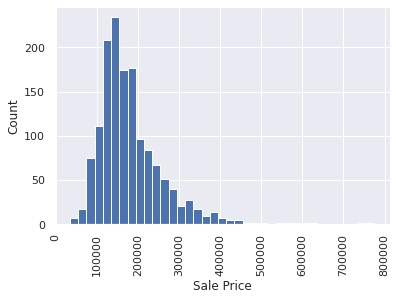

In [5]:
# Define bin size and bin intervals
binsize = 20000
bins = np.arange(df['SalePrice'].min(), df['SalePrice'].max()+binsize, binsize)

# Plot distribution of house price
plt.hist(df['SalePrice'], bins = bins);
plt.xlabel('Sale Price');
plt.xticks(rotation=90);
plt.ylabel('Count');

As the distribution is right-skewed, let's plot the distribution on a log-scale.

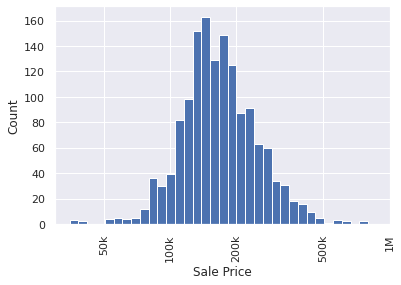

In [6]:
# Define bin size and bin intervals
log_binsize = 0.04
bins = 10 ** np.arange(np.log10(df['SalePrice'].min()), np.log10(df['SalePrice'].max())+log_binsize, log_binsize)

# Plot distribution of house price on a log-scale
plt.hist(df['SalePrice'], bins = bins);
plt.xscale('log')
plt.xlabel('Sale Price');
plt.xticks([5e4, 1e5, 2e5, 5e5, 1e6], ['50k', '100k', '200k', '500k', '1M'], rotation=90)
plt.ylabel('Count');

***Finding(s)***
> - The distribution of house price is right-skewed or positively skewed, with more houses having relatively lower prices, few having higher prices. When the distribution is plotted on a log-scale, the house price distribution looks normal, with the peak located at roughly between 150k and 200k.

Apart from the house prices, the distributions of other top variables that are thought to have a substantial influence on the house price will be plotted and studied. These variables are:

- LotArea, TotalBsmtSF, GrLivArea (*3 continous variables*)
- YearBuilt, YearRemodAdd, FullBath, HalfBath, BedroomAbvGr, GarageCars, YrSold (*7 discrete variables*)
- MSSubClass, Utilities, Neighborhood (*3 nominal variables*)
- OverallQual, OverallCond, ExterQual, ExterCond, BsmtQual, BsmtCond, KitchenQual, Functional, GarageQual, GarageCond (*10 ordinal variables*)

###** Continuous Variables
**LotArea**

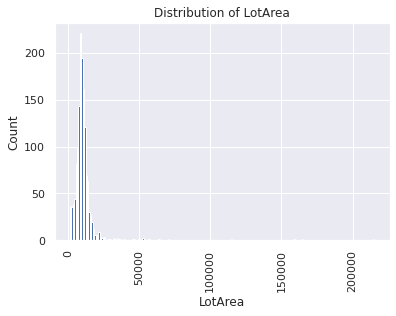

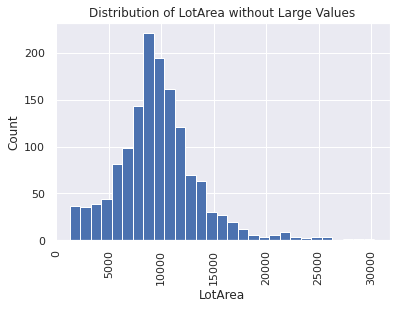

In [7]:
# Define bin size and bin intervals
binsize = 1000
bins = np.arange(df['LotArea'].min(), df['LotArea'].max()+binsize, binsize)

# Plot distribution of LotArea
plt.figure(0);
plt.hist(df['LotArea'], bins = bins);
plt.title('Distribution of LotArea');
plt.xlabel('LotArea');
plt.xticks(rotation=90);
plt.ylabel('Count');

# Plot distribution of LotArea without extremely large values

# Define bin size and bin intervals
max_value = 30000
bins = np.arange(df['LotArea'].min(), max_value+binsize, binsize)

# Plot distribution of LotArea
plt.figure(1);
plt.hist(df['LotArea'], bins = bins);
plt.title('Distribution of LotArea without Large Values');
plt.xlabel('LotArea');
plt.xticks(rotation=90);
plt.ylabel('Count');

***Finding(s)***
> - As shown in the first plot above, there are a few of the houses with extremely large lot size. When plotted without large lot size values, the distribution of lot size is slightly right-skewed as shown in the second plot above, with the peak located at roughly between 75k to 100k. As the large values might be outliers, they will be looked into further in bivariate analysis.

**TotalBsmtSF**

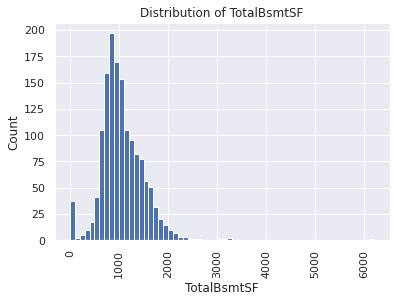

In [8]:
# Define bin size and bin intervals
binsize = 100
bins = np.arange(df['TotalBsmtSF'].min(), df['TotalBsmtSF'].max()+binsize, binsize)

# Plot distribution of TotalBsmtSF
plt.hist(df['TotalBsmtSF'], bins = bins);
plt.title('Distribution of TotalBsmtSF');
plt.xlabel('TotalBsmtSF');
plt.xticks(rotation=90);
plt.ylabel('Count');

***Finding(s)***
> - As shown in the plot above, there are a few of the houses with extremely large basement. The distribution of basement size is slightly right-skewed, with the peak located at roughly 1000. There are quite a number of houses without basement, which explains the huge spike at 0. As the large values might be outliers, they will be looked into further in bivariate analysis.

**GrLivArea**

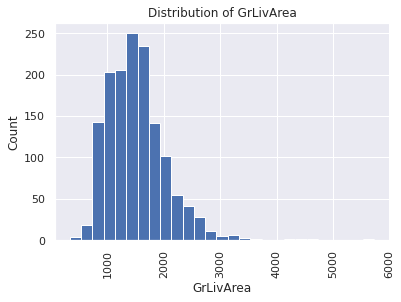

In [9]:
# Define bin size and bin intervals
binsize = 200
bins = np.arange(df['GrLivArea'].min(), df['GrLivArea'].max()+binsize, binsize)

# Plot histogram of GrLivArea
plt.hist(df['GrLivArea'], bins = bins);
plt.title('Distribution of GrLivArea');
plt.xlabel('GrLivArea');
plt.xticks(rotation=90);
plt.ylabel('Count');

***Finding(s)***
> - As shown in the plot above, there are a few of the houses with large living area. The distribution of living area is slightly right-skewed, with the peak located at roughly 1500. As the large values might be outliers, they will be looked into further in bivariate analysis.

### Discrete Variables

**YearBuilt, YearRemodAdd, YrSold**

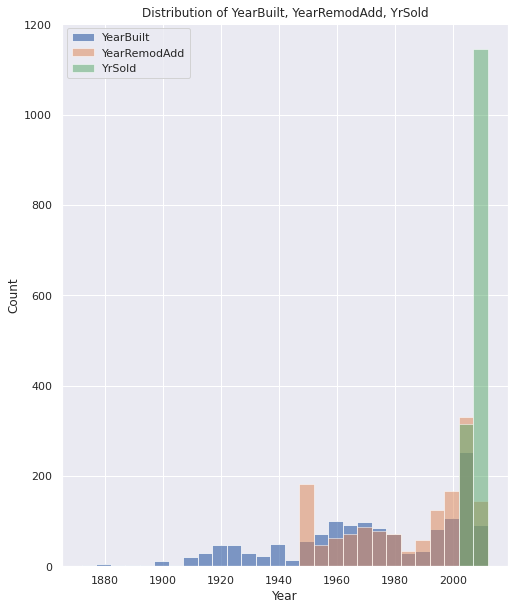

In [10]:
# Define bin size and bin intervals
binsize = 5
min_year = min(df['YearBuilt'].min(), df['YearRemodAdd'].min(), df['YrSold'].min())
max_year = max(df['YearBuilt'].max(), df['YearRemodAdd'].max(), df['YrSold'].max())
bins = np.arange(min_year, max_year+binsize, binsize)

# Plot distribution of YearBuilt, YearRemodAdd, YrSold
plt.figure(figsize=[8, 10])
plt.hist(df['YearBuilt'], bins=bins, alpha = 0.7);
plt.hist(df['YearRemodAdd'], bins=bins, alpha = 0.5);
plt.hist(df['YrSold'], bins=bins, alpha=0.5);
plt.title('Distribution of YearBuilt, YearRemodAdd, YrSold')
plt.xlabel('Year');
plt.ylabel('Count');
plt.legend(['YearBuilt', 'YearRemodAdd', 'YrSold']);

***Finding(s)***
> Based on the distribution shown in the plot above, the following observations are made.
- The distribution of YearBuilt is multimodal, which suggests that large housing development happened every few years.
- There is a small number of houses that are built at the end of the 19th century (around 1880), which is much earlier than most the houses in this dataset.
- The distribution of YearRemodAdd is bimodal (or multimodal), which suggests that remodellings were carried out every few years.
- The first huge spike (as indicated by the first orange bar) in the distribution of YearRemodAdd shows that many houses underwent remodelling somewhere around 1950. However, it is unclear why this is observed.
- All the houses are sold around the same time, which was in the 21st century.
- The distributions of YearBuilt and YearRemodAdd are multimodal, with the peaks and and troughs occuring around the same time. The distributions of YearBuilt and YearRemodAdd may be explained by economic cycle, where peaks correspond to economic booms and troughs correspond to economic recessions.

**FullBath and HalfBath**

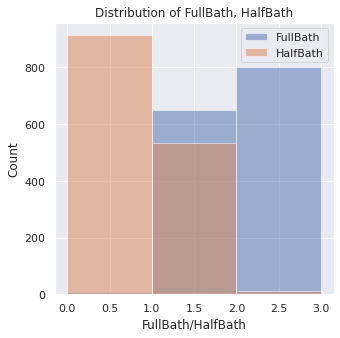

In [11]:
# Define bin size and bin intervals
binsize = 1
bins = np.arange(df['FullBath'].min(), df['FullBath'].max()+binsize, binsize)

# Plot distribution of FullBath and HalfBath
plt.figure(figsize=[5, 5])
plt.hist(df['FullBath'], bins=bins, alpha = 0.5);
plt.hist(df['HalfBath'], bins=bins, alpha = 0.5);
plt.title('Distribution of FullBath, HalfBath')
plt.xlabel('FullBath/HalfBath');
plt.ylabel('Count');
plt.legend(['FullBath', 'HalfBath']);

In [12]:
# Get number of houses without FullBath
len(df[df['FullBath'] == 0])

9

***Finding(s)***
> - Based on the distribution, almost all the houses have 1 or 2 FullBaths, with the exception of 9 houses. Most of the houses do not have HalfBath, and when they do, most of them have only 1 HalfBath. Lastyly, it is uncommon that a house has no FullBath or more than 1 HalfBath. 


**BedroomAbvGr**

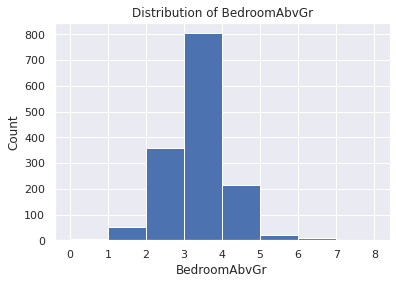

In [13]:
# Define bin size and bin intervals
binsize = 1
bins = np.arange(df['BedroomAbvGr'].min(), df['BedroomAbvGr'].max()+binsize, binsize)

# Plot distribution of BedroomAbvGr
plt.hist(df['BedroomAbvGr'], bins=bins);
plt.title('Distribution of BedroomAbvGr')
plt.xlabel('BedroomAbvGr');
plt.ylabel('Count');

***Finding(s)***
> - The distribution of BedroomAbvGr is slightly right-skewed, with the peak located at 3.


**GarageCars**

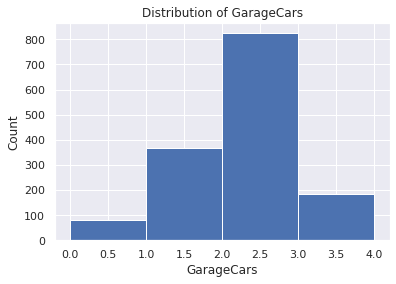

In [14]:
# Define bin size and bin intervals
binsize = 1
bins = np.arange(df['GarageCars'].min(), df['GarageCars'].max()+binsize, binsize)

# Plot distribution of BedroomAbvGr
plt.hist(df['GarageCars'], bins=bins);
plt.title('Distribution of GarageCars')
plt.xlabel('GarageCars');
plt.ylabel('Count');

***Finding(s)***
> - The distribution of GarageCars is slightly left-skewed, with the peak located at 2. Less than 100 houses do not have garage.

### Nominal Variables

**MSSubClass, Utilities, Neighborhood**

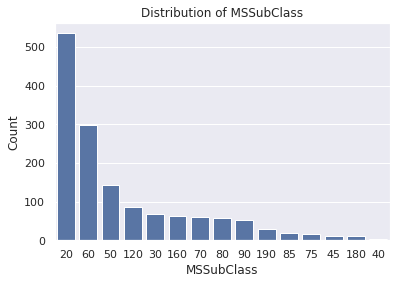

In [15]:
# Define color for countplot
default_color = sns.color_palette()[0]

# Plot distribution of MSSubClass
sns.countplot(df['MSSubClass'], order=df['MSSubClass'].value_counts().index, color=default_color);
plt.title('Distribution of MSSubClass');
plt.ylabel('Count');

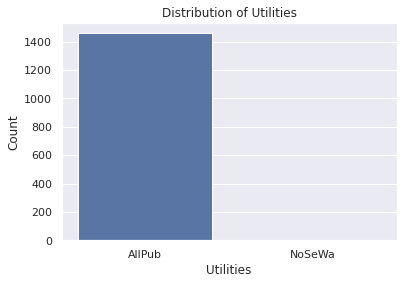

In [16]:
# Plot distribution of Utilities
sns.countplot(df['Utilities'], order=df['Utilities'].value_counts().index, color=default_color);
plt.title('Distribution of Utilities');
plt.ylabel('Count');

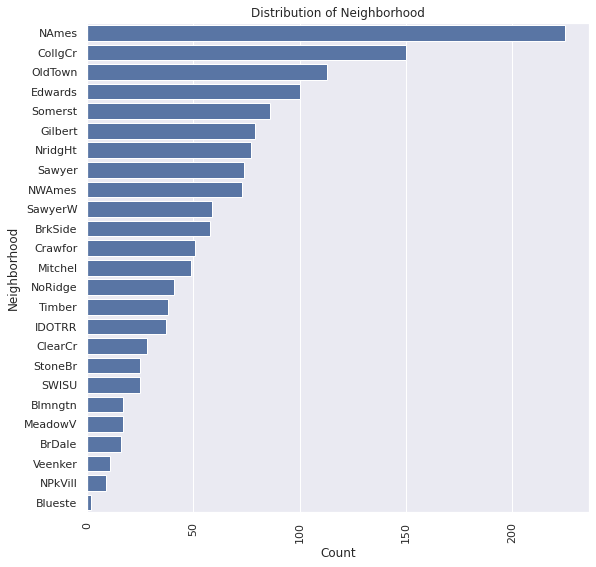

In [17]:
# Plot distribution of Neighborhood
plt.figure(figsize=[9,9])
sns.countplot(y=df['Neighborhood'], order=df['Neighborhood'].value_counts().index, color=default_color);
plt.title('Distribution of Neighborhood');
plt.xticks(rotation=90);
plt.xlabel('Count');

***Finding(s)***
> Based on the three plots above, the following findings are found.
- The most common MSSubClass is 20 (1-STORY 1946 & NEWER ALL STYLES), and the least common one is 40 (1-STORY W/FINISHED ATTIC ALL AGES).
- Almost all the houses have all the public utilities (AllPub), with the exception of several houses having electricity and gas only (NoSeWa). Thus, Utilities is very likely to have no or close to zero influence on the house price. This hypothesis will be verified in bivariate analysis.
- The most common Neighborhood is NAmes or North Ames, and the least common one is Blueste or Bluestem

### Ordinal Variables

In [18]:
# Convert variables into ordered categorical types before plotting the distributions
ordinal_var_dict = {'OverallQual': list(range(0,11)),
                    'OverallCond': list(range(0,11)),
                    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    'BsmtQual': ['NoBsmt', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    'BsmtCond': ['NoBsmt', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
                    'GarageQual': ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                    'GarageCond': ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

**OverallQual, OverallCond, ExterQual, ExterCond, BsmtQual, BsmtCond, GarageQual & GarageCond**

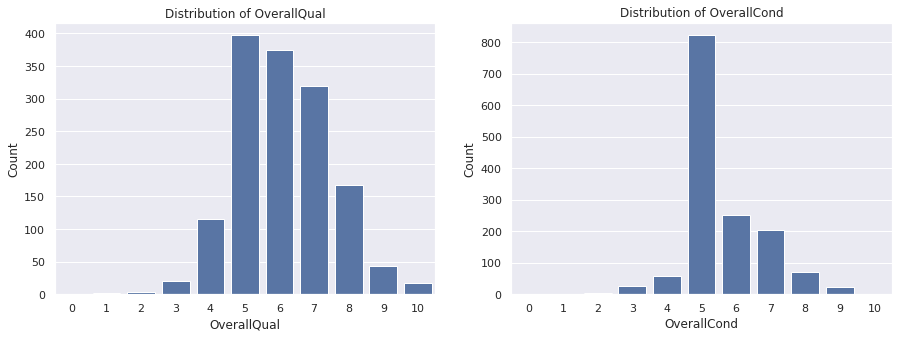

In [19]:
# Plot distribution of OverallQual
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(df['OverallQual'], color=default_color);
plt.title('Distribution of OverallQual');
plt.ylabel('Count');

# Plot distribution of OverallCond
plt.subplot(1,2,2)
sns.countplot(df['OverallCond'], color=default_color);
plt.title('Distribution of OverallCond');
plt.ylabel('Count');

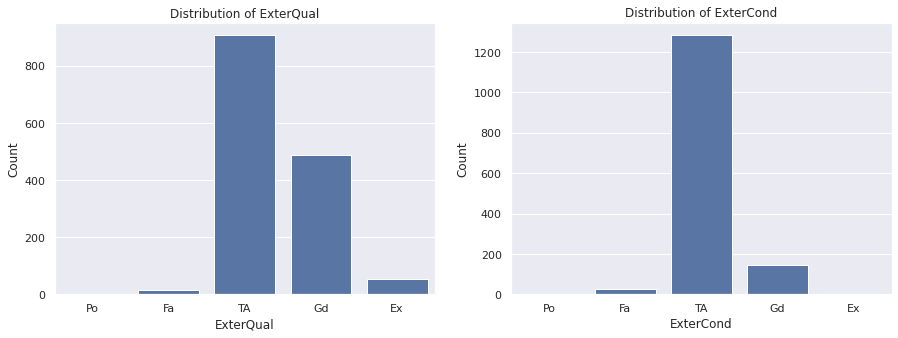

In [20]:
# Plot distribution of ExterQual
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(df['ExterQual'], color=default_color);
plt.title('Distribution of ExterQual');
plt.ylabel('Count');

# Plot distribution of ExterCond
plt.subplot(1,2,2)
sns.countplot(df['ExterCond'], color=default_color);
plt.title('Distribution of ExterCond');
plt.ylabel('Count');

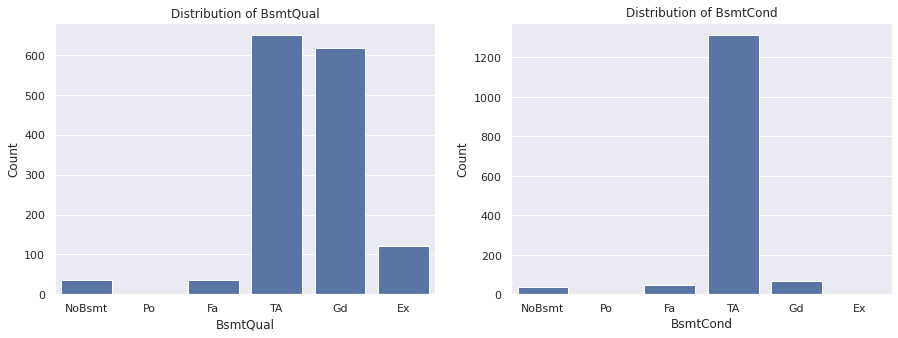

In [21]:
# Plot distribution of BsmtQual
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(df['BsmtQual'], color=default_color);
plt.title('Distribution of BsmtQual');
plt.ylabel('Count');

# Plot distribution of BsmtCond
plt.subplot(1,2,2)
sns.countplot(df['BsmtCond'], color=default_color);
plt.title('Distribution of BsmtCond');
plt.ylabel('Count');

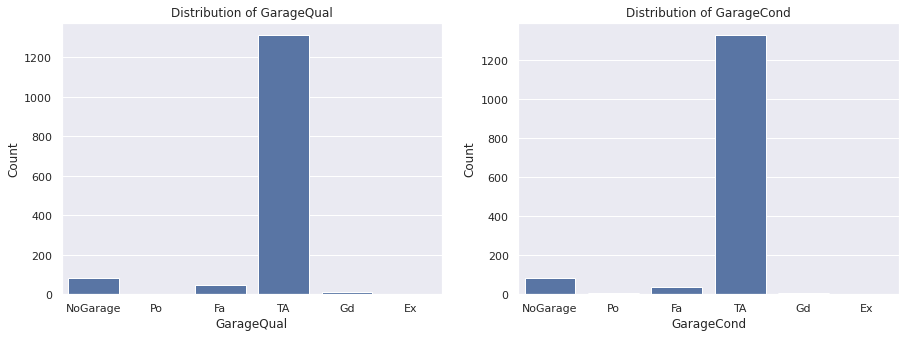

In [22]:
# Plot distribution of GarageQual
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(df['GarageQual'], color=default_color);
plt.title('Distribution of GarageQual');
plt.ylabel('Count');

# Plot distribution of GarageCond
plt.subplot(1,2,2)
sns.countplot(df['GarageCond'], color=default_color);
plt.title('Distribution of GarageCond');
plt.ylabel('Count');

***Finding(s)***
> Based on the plots above, the following findings are found.
- Both the distribution of OverallQual and Overall Cond are right-skewed. Most of the houses have average quality (OverallQual) and condition (OverallCond) as the ratings of quality and condition for most of the houses are 5.
- Most of the houses have average (TA) or better (Gd & Ex) external quality (ExterQual), external condition (ExterCond), basement quality (BsmtQuality), basement condition (BsmtCond), garage quality (GarageQual), garage condition (GarageCond).
- For most of the houses, the quality is better than the condition, apart from the garage.
- As almost all the houses have average(TA) ExterCond, BsmtCond, GarageQual and GarageCond, it is very likely that these variables will have zero or close to zero influences on the house price. This hypothesis will be verified in bivariate analysis.

**KitchenQual & Functional**

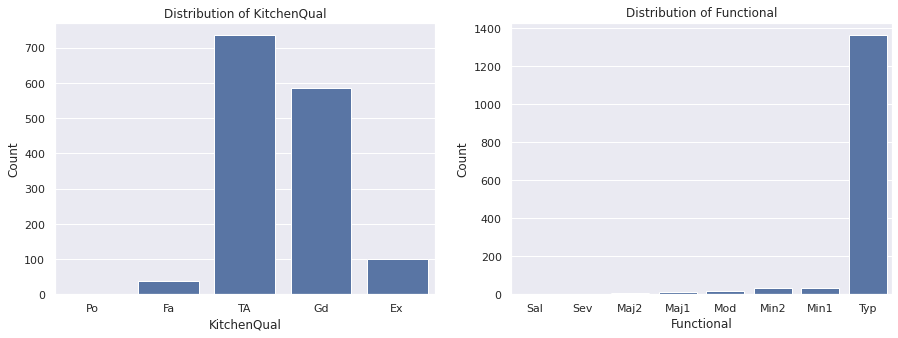

In [23]:
# Plot distribution of KitchenQual
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(df['KitchenQual'], color=default_color);
plt.title('Distribution of KitchenQual');
plt.ylabel('Count');

# Plot distribution of Functional
plt.subplot(1,2,2)
sns.countplot(df['Functional'], color=default_color);
plt.title('Distribution of Functional');
plt.ylabel('Count');

***Finding(s)***
> Based on the plots above, the following findings are found.
- Most of the houses have average (TA) or better (Gd & Ex) kitchen quality (KitchenQual)
- As almost all the houses have typical (Typ) home functionality (Functional), it is very likely that this variable will have zero or close to zero influences on the house price. This hypothesis will be verified in bivariate analysis.

### Univariate Analysis Summary*

Based on all the univariate plots, the following important findings are found.
- The distribution of house price is right-skewed. On a log-scale, the distribution looks normal. Thus, house price must be transformed before using it to train a machine learning model.
- There are some large values in LotArea, TotalBsmtSF, GrLivArea. As these values might be outliers, they will be looked into further in bivariate analysis.
- Utilities, ExterCond, BsmtCond, GarageQual, GarageCond and Functional are likely to have little to no influence on the house price. This hypothesis will be verified in bivariate analysis.

*Note: Univariate analysis is only performed on features/variables that are thought to have a substantial influence on the house price. Thus, univariate analysis summary does not cover all the variables. Bivariate analysis will look into the relationships between all the variables with the house price.